In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

**Import Datasets**

In [ ]:
Category_Data = pd.read_csv('/content/drive/MyDrive/Datasets/Datathon/Category_Data.csv')
Department_Data = pd.read_csv('/content/drive/MyDrive/Datasets/Datathon/Department_Data.csv')
General_Sales_Data = pd.read_csv('/content/drive/MyDrive/Datasets/Datathon/General Sales Data.csv')
Store_Data = pd.read_csv('/content/drive/MyDrive/Datasets/Datathon/Store_Data.csv')

In [ ]:
Category_Data.head()
Department_Data.head()
General_Sales_Data.head()
Store_Data.head()

,Store ID,Store Name,Location
0,8,קייזר8,North East
1,9,קייזר9,Central
2,10,קייזר10,West
3,168,קייזר168,South
4,228,קייזר228,North East


# Data Cleaning & Preprocessing:  

**Handling Null Values**- Category_Data

first we checked whether there are any null values

In [ ]:
Category_Data.isnull().sum()

Category ID      0
Category Name    0
dtype: int64

Then we checked are there any 0 values in category data by replacing 0 with 'NAN"

In [ ]:
Category_Data[['Category ID','Category Name']] = Category_Data[['Category ID','Category Name']].replace(0,np.NaN)

It confirmed that there are no any 0 values

In [ ]:
# Showing the Count of NANs
print(Category_Data.isnull().sum())

Category ID      0
Category Name    0
dtype: int64


**Handling Null Values**- Department_Data

We checked whether there are any null values

In [ ]:
Department_Data.isnull().sum()

Department ID      0
Department Name    1
dtype: int64

It displays there is one null value. So we dropped that

In [ ]:
# Drop rows with missing values in the 'Department ID' column
Department_Data = Department_Data.dropna()

# Check the data types after removing missing values
print("After Removing Missing Values:")
Department_Data.isnull().sum()

After Removing Missing Values:


Department ID      0
Department Name    0
dtype: int64

We checked whether there is 0 values.There is no any 0 values.

In [ ]:
Department_Data[['Department ID','Department Name']] = Department_Data[['Department ID','Department Name']].replace(0,np.NaN)
# Showing the Count of NANs
print(Department_Data.isnull().sum())

Department ID      0
Department Name    0
dtype: int64


**Handling Null Values**- Store_Data

first we checked whether there are any null values

In [ ]:
Store_Data.isnull().sum()

Store ID      0
Store Name    0
Location      0
dtype: int64

We checked whether there is 0 values.There is no any 0 values.

In [ ]:
Store_Data[['Store ID','Store Name','Location']] = Store_Data[['Store ID','Store Name','Location']].replace(0,np.NaN)
# Showing the Count of NANs
print(Store_Data.isnull().sum())

Store ID      0
Store Name    0
Location      0
dtype: int64


**Handling Null Values**- General_Sales_Data

In [ ]:
General_Sales_Data.isnull().sum()


Department ID                                   0
Category ID                                     0
Store ID                                        0
Sale Quantity                                   0
Gross Value for single Product (Single Sale)    0
Retail Value (Single Sale)                      0
Tax with Revenue                                0
Cost                                            0
Tax per unit                                    0
TotalQTY                                        0
TotalSales                                      0
SalesDate                                       0
Sales Time                                      0
Buying price per product                        0
dtype: int64

since General_Sales_Data can be had 0 values we don't replace with 0 with NAN

**Conversion of Data Types before concatenate**

In [ ]:
# Check the current data types
print("Before Conversion:")
print(Department_Data.dtypes)

# Convert 'Department ID' column to int
Department_Data['Department ID'] = Department_Data['Department ID'].astype(int)

# Check the data types after conversion
print("\nAfter Conversion:")
print(Department_Data.dtypes)



Before Conversion:
Department ID      object
Department Name    object
dtype: object

After Conversion:
Department ID       int64
Department Name    object
dtype: object


In [ ]:
General_Sales_Data.dtypes

Department ID                                     int64
Category ID                                       int64
Store ID                                          int64
Sale Quantity                                     int64
Gross Value for single Product (Single Sale)    float64
Retail Value (Single Sale)                      float64
Tax with Revenue                                  int64
Cost                                              int64
Tax per unit                                    float64
TotalQTY                                          int64
TotalSales                                      float64
SalesDate                                        object
Sales Time                                       object
Buying price per product                        float64
dtype: object

**Merge 4 Datasets**

Merge General_Sales_Data with Category_Data

In [ ]:
# Join Category Data with General Sales Data on Category ID
merged_data = pd.merge(General_Sales_Data, Category_Data, on='Category ID', how='left')



In [ ]:
merged_data.head()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,עזרי ניקוי אחרים
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,בייצים
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,שימורי עגבניות
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,שימורי פירות
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,שימורי ירקות


Merge merged_data with Department_Data

In [ ]:
# Join Department Data with the merged data on Department ID
merged_data = pd.merge(merged_data, Department_Data, on='Department ID', how='left')


In [ ]:
merged_data.head()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name,Department Name_x,Department Name_y
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,עזרי ניקוי אחרים,עזרי ניקוי,עזרי ניקוי
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,בייצים,בייצים,בייצים
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,שימורי עגבניות,עולם שימורים וחמוצים,עולם שימורים וחמוצים
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,שימורי פירות,עולם שימורים וחמוצים,עולם שימורים וחמוצים
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,שימורי ירקות,עולם שימורים וחמוצים,עולם שימורים וחמוצים


Merge merged_data with Store_Data

In [ ]:
# Join Store Data with the merged data on Store ID
final_merged_data = pd.merge(merged_data, Store_Data, on='Store ID', how='left')

In [ ]:
final_merged_data

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name,Department Name,Store Name,Location
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,עזרי ניקוי אחרים,עזרי ניקוי,קייזר256,southwest
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,בייצים,בייצים,קייזר256,southwest
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,שימורי עגבניות,עולם שימורים וחמוצים,קייזר256,southwest
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,שימורי פירות,עולם שימורים וחמוצים,קייזר256,southwest
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,שימורי ירקות,עולם שימורים וחמוצים,קייזר256,southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372534,883,243,254,12,5.62,6.576333,0,0,0.96,12,67.422,3/14/2023 23:59,10:16:33,4.38,סוכריות,עולם מתוקים,קייזר254,North
372535,881,244,254,114,2.43,2.843614,0,0,0.41,114,277.246,3/14/2023 23:59,19:25:10,1.97,שמנת חמוצה/מדף,מוצרי מדף חלביים,קייזר254,North
372536,911,245,254,6,10.81,12.648333,0,0,1.84,6,64.870,3/14/2023 23:59,20:49:40,8.11,חטיפי דגנים כל הסוגים,עולם דגנים והגרנולה,קייזר254,North
372537,864,249,254,5,8.46,9.898000,0,0,1.44,5,42.310,3/14/2023 23:59,21:57:32,5.75,חומץ/מיצ לימון,"עולם רטבים, תבלינים וחומרי בישול ואפייה",קייזר254,North


**Handling Duplicate Values**

In [ ]:
final_merged_data.shape

(372539, 18)

There are no any duplicate values

In [ ]:
duplicate =final_merged_data.duplicated()
print(duplicate)

0         False
1         False
2         False
3         False
4         False
          ...  
372534    False
372535    False
372536    False
372537    False
372538    False
Length: 372539, dtype: bool


---------------------------------------------------------------------------

**Since all the values of 'Tax with Revenue' and 'Cost' columns are having 0 value, we can drop those 2 columns.**

In [ ]:
final_merged_data['Tax with Revenue'].value_counts()

0    372539
Name: Tax with Revenue, dtype: int64

In [ ]:
final_merged_data['Cost'].value_counts()

0    372539
Name: Cost, dtype: int64

In [ ]:
# Drop two columns
columns_to_drop = ['Tax with Revenue', 'Cost']
final_merged_data = final_merged_data.drop(columns=columns_to_drop)

In [ ]:
#After dropping 'Tax with Revenue' and 'Cost'
final_merged_data.head()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name,Department Name,Store Name,Location
0,893,260,256,2,9.32,10.904000,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,עזרי ניקוי אחרים,עזרי ניקוי,קייזר256,southwest
1,922,261,256,88,15.96,18.672727,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,בייצים,בייצים,קייזר256,southwest
2,9,7,256,10,8.03,9.395700,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,שימורי עגבניות,עולם שימורים וחמוצים,קייזר256,southwest
3,9,8,256,3,6.81,7.968000,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,שימורי פירות,עולם שימורים וחמוצים,קייזר256,southwest
4,9,10,256,3,13.88,16.237667,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,שימורי ירקות,עולם שימורים וחמוצים,קייזר256,southwest


In [ ]:
final_merged_data.describe()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Buying price per product
count,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000
mean,847.899925,192.334424,243.795117,31.291658,14.644503,16.951390,2.307140,31.277241,289.375671,11.081090
std,195.542087,104.581326,59.998385,87.845791,14.911198,16.968843,2.350968,87.850843,727.944891,11.161569
min,9.000000,7.000000,8.000000,-248.000000,0.000000,-0.000100,-5.210000,-248.000000,-5940.230000,0.000000
25%,870.000000,116.000000,241.000000,2.000000,7.860000,9.150000,1.220000,2.000000,31.210000,5.995000
50%,887.000000,177.000000,256.000000,7.000000,11.530000,13.371333,1.870000,7.000000,87.090000,8.670000
75%,910.000000,277.000000,272.000000,23.000000,16.730000,19.405000,2.750000,23.000000,253.843000,12.510000
max,939.000000,1225.000000,292.000000,4106.000000,585.110000,684.557000,99.450000,4106.000000,33435.989000,403.750000


In [ ]:
# Specify the columns you want to check for negative values
columns_to_check = ['Sale Quantity', 'Retail Value (Single Sale)','Tax per unit','TotalQTY ','TotalSales']

# Filter rows with at least one negative value in specified columns
rows_with_negatives = final_merged_data[(final_merged_data[columns_to_check] < 0).any(axis=1)]

# Print the resulting DataFrame
rows_with_negatives

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name,Department Name,Store Name,Location
742,867,56,261,1,0.00,0.000,0.00,0,-0.0001,3/16/2023 23:59,19:16:25,0.00,טיהור אוויר,חומרי ניקוי אחרים,קייזר261,Central
1114,885,240,8,-1,12.74,14.900,2.16,-1,-12.7400,3/16/2023 23:59,21:42:42,9.56,סודה קלאב,כלי בית,קייזר8,North East
2346,918,204,270,-2,13.59,15.900,2.31,-2,-27.1800,3/16/2023 23:59,13:08:37,9.92,תה וחליטות,משקאות לא אלכוהוליים לא מוכנים לשתייה,קייזר270,South
2363,911,245,270,1,4.96,4.960,0.00,0,-4.9570,3/16/2023 23:59,8:20:56,4.56,חטיפי דגנים כל הסוגים,עולם דגנים והגרנולה,קייזר270,South
4906,931,315,228,-4,3.38,3.955,0.58,-4,-13.5000,3/16/2023 23:59,17:51:03,2.46,מרקים אישיים,"עולם ארוחות, מנות עיקריות ומרקים שאינם ל",קייזר228,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366117,904,133,9,-1,11.88,13.900,2.02,-1,-11.8800,3/14/2023 23:59,21:36:52,9.27,פירות יבשים ארוזים,פירות יבשים,קייזר9,Central
368160,9,11,283,-2,9.92,11.605,1.69,-2,-19.8300,3/14/2023 23:59,18:33:50,7.83,זיתים,עולם שימורים וחמוצים,קייזר283,North
368694,893,270,288,-1,17.09,20.000,2.91,-1,-17.0900,3/14/2023 23:59,8:43:58,13.15,כפפות גומי,עזרי ניקוי,קייזר288,North
369832,864,322,235,1,15.38,15.380,0.00,0,-15.3800,3/14/2023 23:59,13:28:35,14.00,"מלח, סוכר וממתיקים מלאכותיים","עולם רטבים, תבלינים וחומרי בישול ואפייה",קייזר235,Central


This shows there are some negative values in these columns.**'Sale Quantity', 'Retail Value (Single Sale)','Tax per unit','TotalQTY ','TotalSales'**.

Negative values in these columns are uncommon and might indicate errors. So It will not be an issue of removing those 412 rows out of 372539 rows**(0.11%)**.

In [ ]:
# Remove rows with negative values from the original DataFrame
final_merged_data = final_merged_data.drop(rows_with_negatives.index)

# Print the resulting DataFrame
final_merged_data

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Category Name,Department Name,Store Name,Location
0,893,260,256,2,9.32,10.904000,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,עזרי ניקוי אחרים,עזרי ניקוי,קייזר256,southwest
1,922,261,256,88,15.96,18.672727,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,בייצים,בייצים,קייזר256,southwest
2,9,7,256,10,8.03,9.395700,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,שימורי עגבניות,עולם שימורים וחמוצים,קייזר256,southwest
3,9,8,256,3,6.81,7.968000,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,שימורי פירות,עולם שימורים וחמוצים,קייזר256,southwest
4,9,10,256,3,13.88,16.237667,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,שימורי ירקות,עולם שימורים וחמוצים,קייזר256,southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372534,883,243,254,12,5.62,6.576333,0.96,12,67.422,3/14/2023 23:59,10:16:33,4.38,סוכריות,עולם מתוקים,קייזר254,North
372535,881,244,254,114,2.43,2.843614,0.41,114,277.246,3/14/2023 23:59,19:25:10,1.97,שמנת חמוצה/מדף,מוצרי מדף חלביים,קייזר254,North
372536,911,245,254,6,10.81,12.648333,1.84,6,64.870,3/14/2023 23:59,20:49:40,8.11,חטיפי דגנים כל הסוגים,עולם דגנים והגרנולה,קייזר254,North
372537,864,249,254,5,8.46,9.898000,1.44,5,42.310,3/14/2023 23:59,21:57:32,5.75,חומץ/מיצ לימון,"עולם רטבים, תבלינים וחומרי בישול ואפייה",קייזר254,North


Now there are no any negative values

In [ ]:
final_merged_data.describe()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Buying price per product
count,372127.000000,372127.000000,372127.000000,372127.000000,372127.000000,372127.000000,372127.000000,372127.000000,372127.000000,372127.00000
mean,847.887192,192.329111,243.800235,31.328251,14.644229,16.951469,2.307494,31.314081,289.745208,11.08039
std,195.571368,104.576243,59.993896,87.886432,14.906849,16.963334,2.349785,87.891401,728.191257,11.15778
min,9.000000,7.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,870.000000,116.000000,241.000000,2.000000,7.860000,9.150250,1.220000,2.000000,31.370000,6.00000
50%,887.000000,177.000000,256.000000,7.000000,11.530000,13.371765,1.870000,7.000000,87.352000,8.67000
75%,910.000000,277.000000,272.000000,23.000000,16.730000,19.400000,2.750000,23.000000,254.221500,12.51000
max,939.000000,1225.000000,292.000000,4106.000000,585.110000,684.557000,99.450000,4106.000000,33435.989000,403.75000


In [ ]:
final_merged_data.columns

Index(['Department ID', 'Category ID', 'Store ID', 'Sale Quantity',
       'Gross Value for single Product (Single Sale)',
       'Retail Value (Single Sale)', 'Tax per unit', 'TotalQTY ', 'TotalSales',
       'SalesDate', 'Sales Time', 'Buying price per product', 'Category Name',
       'Department Name', 'Store Name', 'Location'],
      dtype='object')

# Exploratory Data Analysis and Visualization:  

<ipython-input-96-8e96e32998f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_merged_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


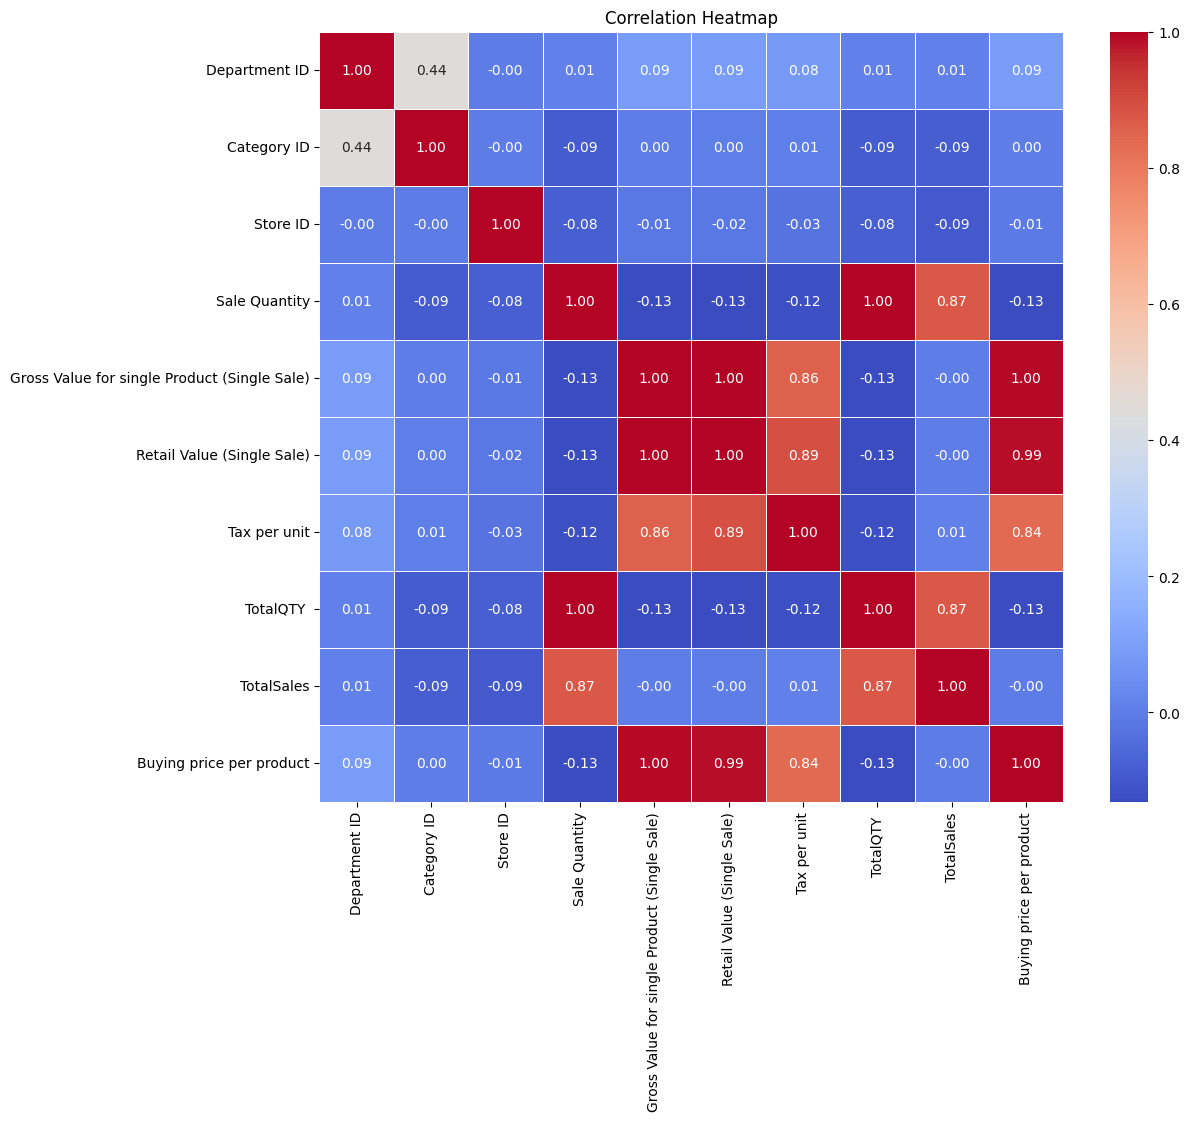

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(final_merged_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

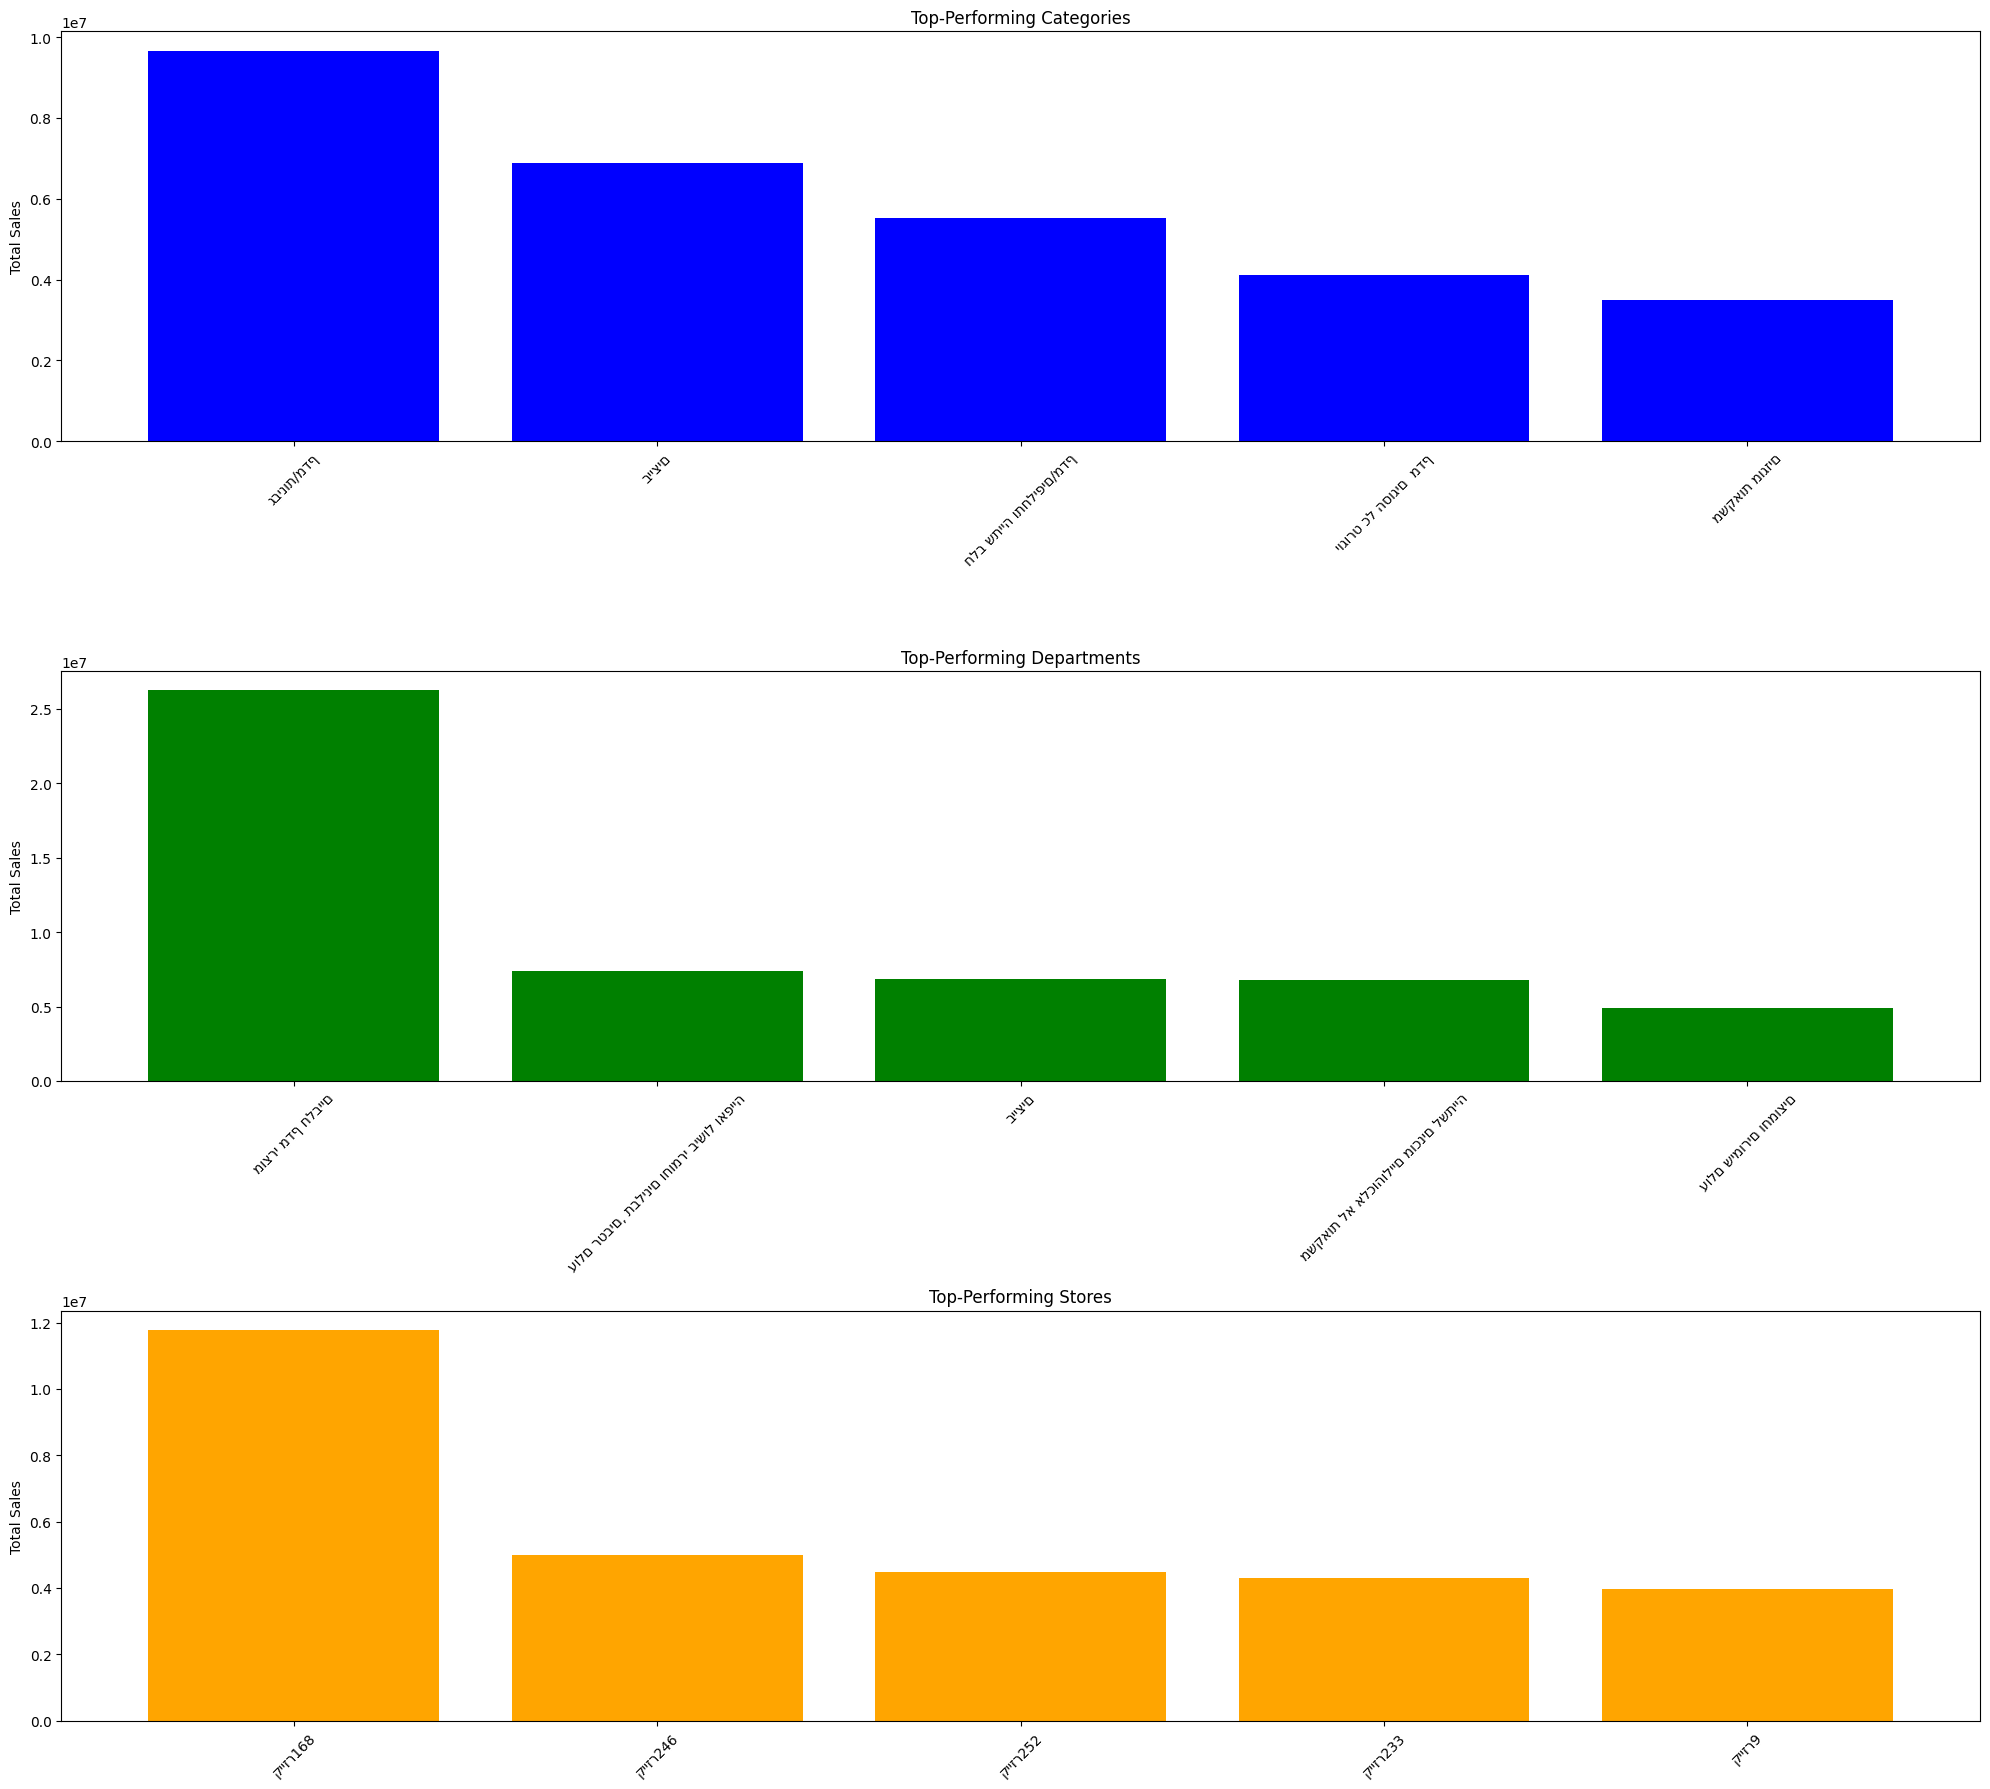

In [ ]:
# Group by Category Name and calculate total sales for each category
category_sales = final_merged_data.groupby('Category Name')['TotalSales'].sum().sort_values(ascending=False)

# Group by Department Name and calculate total sales for each department
department_sales = final_merged_data.groupby('Department Name')['TotalSales'].sum().sort_values(ascending=False)

# Group by Store Name and calculate total sales for each store
store_sales = final_merged_data.groupby('Store Name')['TotalSales'].sum().sort_values(ascending=False)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(20, 18))

# Top-Performing Categories
axes[0].bar(category_sales.head().index, category_sales.head().values, color='blue')
axes[0].set_title('Top-Performing Categories')
axes[0].set_ylabel('Total Sales')

# Top-Performing Departments
axes[1].bar(department_sales.head().index, department_sales.head().values, color='green')
axes[1].set_title('Top-Performing Departments')
axes[1].set_ylabel('Total Sales')

# Top-Performing Stores
axes[2].bar(store_sales.head().index, store_sales.head().values, color='orange')
axes[2].set_title('Top-Performing Stores')
axes[2].set_ylabel('Total Sales')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

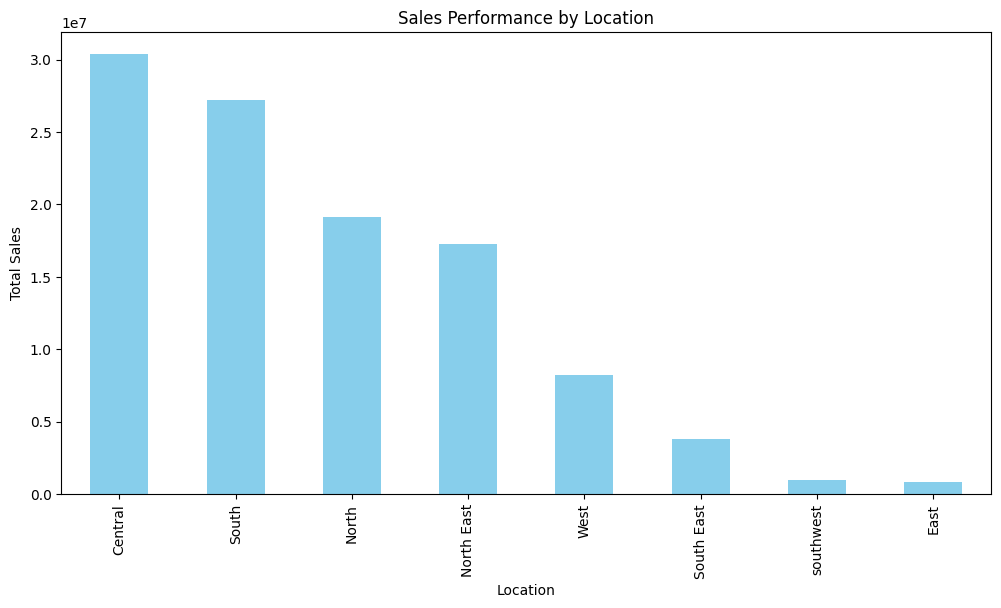

In [ ]:
# Group by Location and calculate total sales for each geographical area
location_sales = final_merged_data.groupby('Location')['TotalSales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
location_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Performance by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.show()

This dataset shows only the data of 2 months

In [ ]:
# Get the oldest date value
oldest_date = final_merged_data['SalesDate'].min()

# Get the latest date value
latest_date = final_merged_data['SalesDate'].max()

print(f"Oldest Date: {oldest_date}")
print(f"Latest Date: {latest_date}")

Oldest Date: 2/13/2023 23:59
Latest Date: 4/9/2023 23:59


# Time Series Analysis

In [ ]:
# Assuming 'SalesDate' is not yet in datetime format
final_merged_data['SalesDate'] = pd.to_datetime(final_merged_data['SalesDate'])

# Set 'SalesDate' as the index
final_merged_data.set_index('SalesDate', inplace=True)

# Resample to daily frequency
daily_data = final_merged_data.resample('D').sum()




<ipython-input-102-640bf3fb189b>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = final_merged_data.resample('D').sum()


**Trend Analysis**

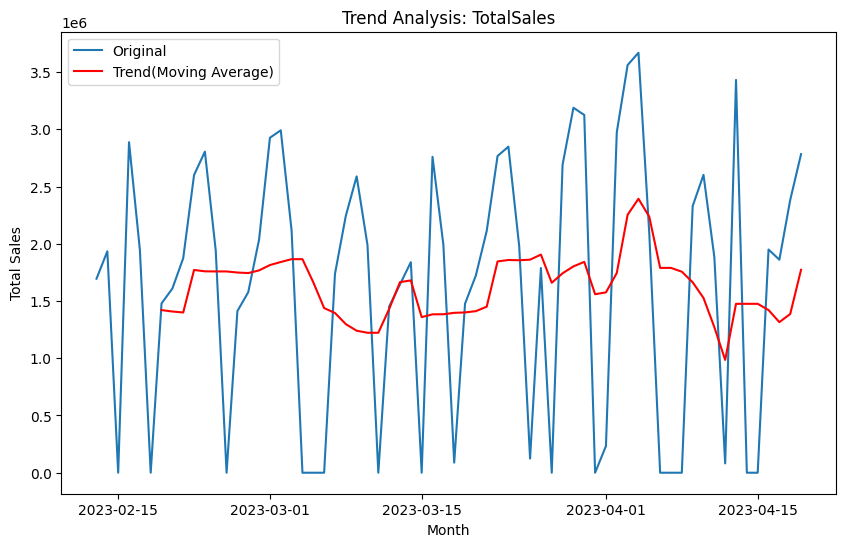

In [ ]:
# Calculate the rolling mean (simple moving average) with a window size of 7 days
rolling_mean = daily_data['TotalSales'].rolling(window=7).mean()

# Visualize the original time series and the trend component
plt.figure(figsize=(10, 6))
plt.plot(daily_data['TotalSales'], label='Original')
plt.plot(rolling_mean,color='red', label='Trend(Moving Average)')
plt.title('Trend Analysis: TotalSales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

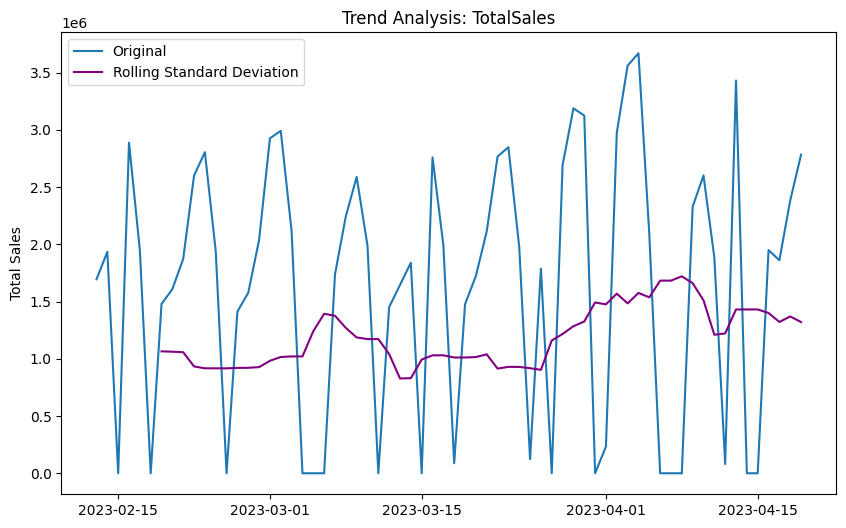

In [ ]:
# Calculate the rolling standard deviation with a window size of 7 days
rolling_std = daily_data['TotalSales'].rolling(window=7).std()

# Visualize the original time series, trend component, and rolling standard deviation in one diagram
plt.figure(figsize=(10, 6))
plt.plot(daily_data['TotalSales'], label='Original')
plt.plot(rolling_std, label='Rolling Standard Deviation', color='purple')
plt.title('Trend Analysis: TotalSales')
plt.ylabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

**Seasonal Decomposition of Time Series(STL)**

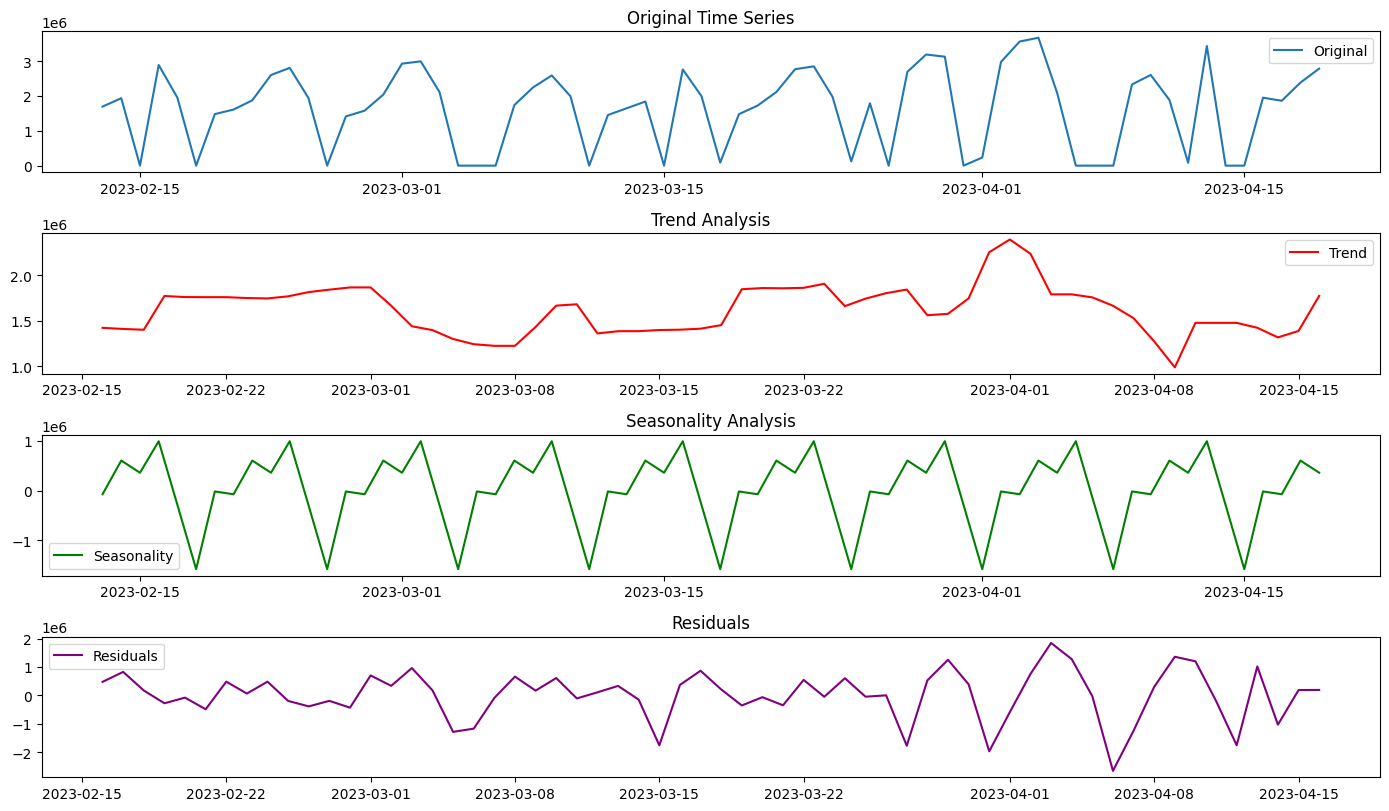

In [ ]:
# Decompose time series into trend, seasonality, and residual components
result = seasonal_decompose(daily_data['TotalSales'], model='additive')
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualize the original time series, trend, and seasonality
plt.figure(figsize=(14, 10))
plt.subplot(5, 1, 1)
plt.plot(daily_data['TotalSales'], label='Original')
plt.title('Original Time Series')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend Analysis')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality Analysis')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(residual, label='Residuals', color='purple')
plt.title('Residuals')
plt.legend()

plt.tight_layout()


# Time Series Forcasting


**ExponentialSmoothing**


---



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Mean Absolute Error: 1257515.9156749193


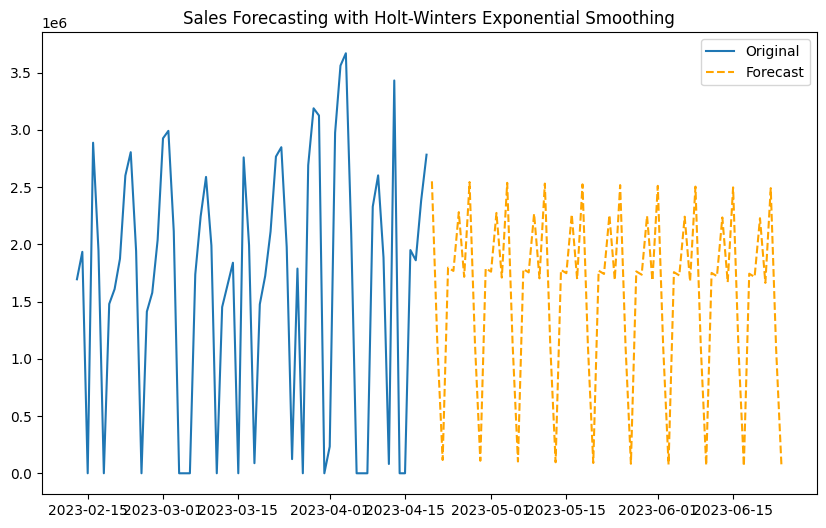

In [ ]:
# Develop and evaluate time series forecasting models
model = ExponentialSmoothing(daily_data['TotalSales'], trend='add', seasonal='add', seasonal_periods=7)  # Adjust seasonal_periods as needed
result = model.fit()
forecast = result.forecast(steps=len(daily_data))

# Assess model accuracy
mae = mean_absolute_error(daily_data['TotalSales'], forecast)
print(f'Mean Absolute Error: {mae}')

# Visualize the original time series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_data['TotalSales'], label='Original')
plt.plot(forecast, label='Forecast', linestyle='dashed', color='orange')
plt.title('Sales Forecasting with Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()










**ARIMA - Autoregressive Integrated Moving Average**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Absolute Error on Training Data: 1005690.4640717596


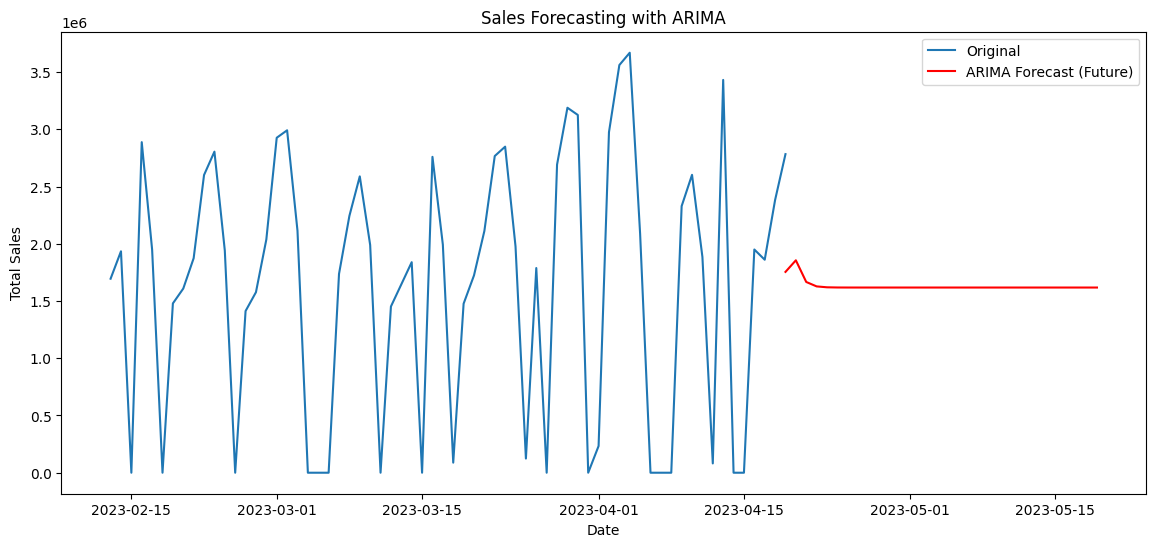

In [ ]:
# Fit the ARIMA model
model = ARIMA(daily_data['TotalSales'], order=(1, 1, 1))
result = model.fit()

# Specify the future time period for prediction
future_periods = 30  # Adjust as needed

# Make predictions for the future
forecast = result.predict(start=daily_data.index[-1], end=daily_data.index[-1] + pd.DateOffset(days=future_periods), typ='levels')

# Assess model accuracy (you may want to split your data into training and testing sets for a more meaningful evaluation)
mae = mean_absolute_error(daily_data['TotalSales'], result.fittedvalues)
print(f'Mean Absolute Error on Training Data: {mae}')

# Visualize the original time series and the predictions into the future
plt.figure(figsize=(14, 6))
plt.plot(daily_data['TotalSales'], label='Original')
plt.plot(forecast, color='red', label='ARIMA Forecast (Future)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Forecasting with ARIMA')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error with SARIMA on Training Data: 837719.1450401274


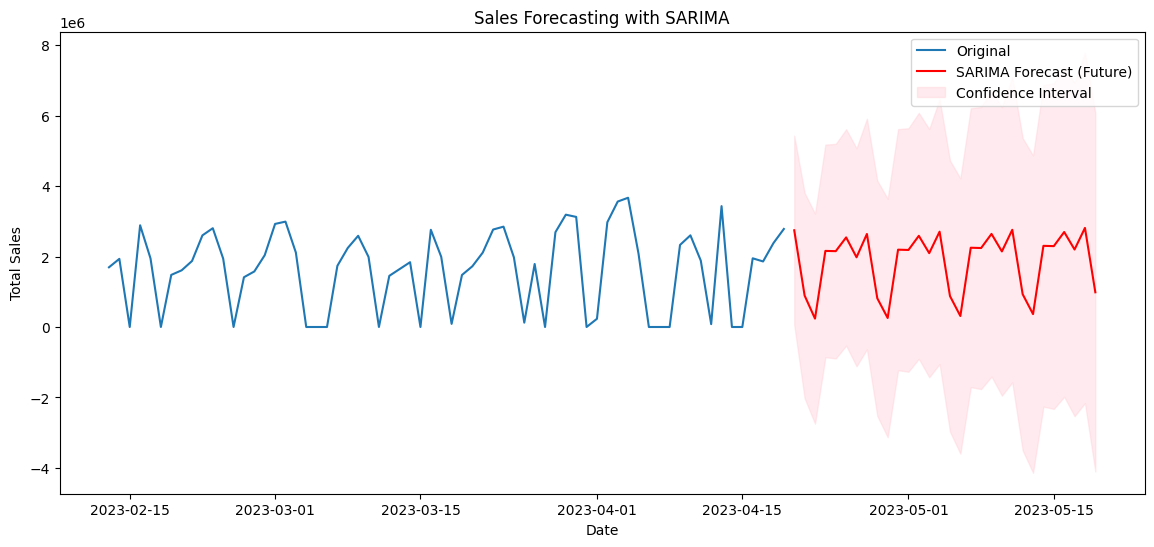

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S); assuming weekly seasonality

model_sarima = SARIMAX(daily_data['TotalSales'], order=order, seasonal_order=seasonal_order)
result_sarima = model_sarima.fit()

# Specify the future time period for prediction
future_periods = 30  # Adjust as needed

# Make predictions for the future with SARIMA
forecast_sarima = result_sarima.get_forecast(steps=future_periods)

# Assess SARIMA model accuracy (you may want to split your data into training and testing sets for a more meaningful evaluation)
mae_sarima = mean_absolute_error(daily_data['TotalSales'], result_sarima.fittedvalues)
print(f'Mean Absolute Error with SARIMA on Training Data: {mae_sarima}')

# Visualize the original time series, fitted values on training data, and SARIMA predictions into the future
plt.figure(figsize=(14, 6))
plt.plot(daily_data['TotalSales'], label='Original')
plt.plot(forecast_sarima.predicted_mean.index, forecast_sarima.predicted_mean.values, color='red', label='SARIMA Forecast (Future)')
plt.fill_between(forecast_sarima.conf_int().index, forecast_sarima.conf_int()['lower TotalSales'], forecast_sarima.conf_int()['upper TotalSales'], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Forecasting with SARIMA')
plt.legend()
plt.show()


# Model Generalization

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare data
X = daily_data.drop('TotalSales', axis=1)
y = daily_data['TotalSales']

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store mean absolute errors for each model
mae_exp_smoothing_list = []
mae_arima_list = []
mae_sarima_list = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    try:
        # Exponential Smoothing
        model_exp_smoothing = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
        results_exp_smoothing = model_exp_smoothing.fit()
        forecast_exp_smoothing = results_exp_smoothing.forecast(steps=len(test_index))
        mae_exp_smoothing = mean_absolute_error(y_test, forecast_exp_smoothing)
        mae_exp_smoothing_list.append(mae_exp_smoothing)
    except ValueError as e:
        print(f"Exponential Smoothing failed: {e}")
        mae_exp_smoothing_list.append(np.nan)

    # ARIMA
    model_arima = ARIMA(y_train, order=(1, 1, 1))
    results_arima = model_arima.fit()
    forecast_arima = results_arima.predict(start=test_index[0], end=test_index[-1], typ='levels')
    mae_arima = mean_absolute_error(y_test, forecast_arima)
    mae_arima_list.append(mae_arima)

    # SARIMA
    model_sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results_sarima = model_sarima.fit()
    forecast_sarima = results_sarima.predict(start=test_index[0], end=test_index[-1], typ='levels')
    mae_sarima = mean_absolute_error(y_test, forecast_sarima)
    mae_sarima_list.append(mae_sarima)

# Calculate the mean MAE across folds
mean_mae_exp_smoothing = np.nanmean(mae_exp_smoothing_list)
mean_mae_arima = np.mean(mae_arima_list)
mean_mae_sarima = np.mean(mae_sarima_list)

print(f'Mean Absolute Error (Exponential Smoothing): {mean_mae_exp_smoothing}')
print(f'Mean Absolute Error (ARIMA): {mean_mae_arima}')
print(f'Mean Absolute Error (SARIMA): {mean_mae_sarima}')



Exponential Smoothing failed: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['ty

Exponential Smoothing failed: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.wa

Mean Absolute Error (Exponential Smoothing): 1372421.2386062362
Mean Absolute Error (ARIMA): 1070734.6783684723
Mean Absolute Error (SARIMA): 1494967.4167966167


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


**It is showing like this in the output.**
Mean Absolute Error (Exponential Smoothing): 1372421.2386062362
Mean Absolute Error (ARIMA): 1070734.6783684723
Mean Absolute Error (SARIMA): 1494967.4167966167

The Mean Absolute Errors (MAEs) We obtained for Exponential Smoothing, ARIMA, and SARIMA models indicate the average absolute differences between the actual and predicted values. Lower MAE values suggest better model performance. Let's interpret the results:

**Exponential Smoothing: MAE = 1,372,421.24**

The Exponential Smoothing model has an average absolute prediction error of approximately 1,372,421.24 units. This is the magnitude of the average difference between the predicted and actual values.


**ARIMA: MAE = 1,070,734.68**

The ARIMA model has an average absolute prediction error of approximately 1,070,734.68 units. This is the magnitude of the average difference between the predicted and actual values.


**SARIMA: MAE = 1,494,967.42**

The SARIMA model has an average absolute prediction error of approximately 1,494,967.42 units. This is the magnitude of the average difference between the predicted and actual values.


lower MAE values indicate better model performance.ARIMA is performing better than Exponential Smoothing and SARIMA